In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.express as px

In [3]:
sns.set(
    font_scale =2,
    style      ='whitegrid',
    rc         ={'figure.figsize':(20,7)})

In [ ]:
# 1) Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:
# Date — дата
# AveragePrice — средняя цена одного авокадо
# Total Volume — количество проданных авокадо
# 4046 — количество проданных авокадо PLU* 4046
# 4225 — количество проданных авокадо PLU 4225
# 4770 — количество проданных авокадо PLU 4770
# Total Bags — всего упаковок
# Small Bags — маленькие упаковки
# Large Bags — большие
# XLarge Bags — очень большие
# type — обычный или органический
# year — год
# Region — город или регион the city or region of the observation
# *PLU — код товара (Product Lookup code)

# *В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть
#несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим,
# что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, где:

# avocado_mean = pd.read_csv("path",
#                            index_col=0, squeeze=True, parse_dates=['Date'])

#                            Date
#                            2015-01-04    1.301296
#                            2015-01-11    1.370648
#                            2015-01-18    1.391111
#                            2015-01-25    1.397130
#                            2015-02-01    1.247037
#                            Name: AveragePrice, dtype: float64

# 2) Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение?
# Ответ округлите до 2 знаков после точки.

# 3) Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график
#в зависимости от выбранного размера окна.
# Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50),
#посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна. (task3.png)

# 4) ⭐️Задание со звёздочкой!⭐️
# ​​​​Изучите параметры функций:
# - axis
# - center
# - closed
# - min_periods
# - on
# - win_type
# - window
# в документации https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html   
#и дайте характеристику каждой из вышеперечисленных.

# 5) ⭐️Задание со звёздочкой!⭐️
# Используйте агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, 
#чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

# 6) ⭐️Задание со звёздочкой!⭐️
# И еще один стэп, чтобы закрепить материал. Импортируйте полные данные, (avocado_full.csv) указав index_col=0 
#(использовать первую колонку как индекс).
# Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное 
# скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски.
# Числа округлите до трех знаков после точки.

# 7) 💀 Сложное задание! 💀
# Далее будем работать с данными по опозданиям в заключении сделок!
# В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, 
# а самое важное – насколько они при этом опоздали. Вот сабсэт данных

#  		client_idcompany_id	delay		revenue
#  	0	2389	4240	-1 days -14:57:48.000000000	705436
#  	1	7614	9544	-4 days -02:14:23.000000000	859266
#  	2	2052	2427	-0 days -06:08:57.000000000	812416
#  	3	9635	8054	-0 days -23:40:19.000000000	162312
#  	4	8154	5503	-1 days -13:21:53.000000000	658844

# Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – 
#нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) 
#и переведите её в тип timedelta.
# Могут понадобиться:
# pd.to_timedelta()
# pd.Series.str

# 8) Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите 
# соответствующие значения в колонку delay_categorical
# Могут понадобится:
# pd.cut()

# 9) 💀 Сложное задание! 💀
# Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. 
#В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были
# 'less than 1 day' – время от 0 до 1 дня
# '1-2 days' – от 1 до 2 дней
# '2-3 days' – от 2 до 3 дней
# 'more than 3 days' – больше 3 дней
# Например, для следующего примера
# client_id  company_id  delay            revenue
# 14345      54631       2 days 13:34:45  145345
# 54434      54834       1 days 08:26:00  453245
# 34905      49834       0 days 00:26:03  14543
# результом будет
# client_id  company_id  delay            revenue  delay_categorical
# 14345      54631       2 days 13:34:45  145345   2-3 days
# 54434      54834       1 days 08:26:00  453245   1-2 days
# 34905      49834       0 days 00:26:03  14543    less than 1 day
# Могут понадобится:
# pd.cut()
# pd.to_timedelta()

# 10) Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки, 
#выясните самый редкий и самый частый варианты.

##  1. Загрузка DataFrame

In [4]:
avocado_mean = pd.read_csv("avocado_mean.csv", index_col='Date', parse_dates=['Date'])

## 2.  Посчитайте скользящее среднее цены авокадо (AveragePrice) 
с окном равным 3 (window). Чему равно максимальное значение?
Ответ округлите до 2 знаков после точки.

In [8]:
avocado_mean_rolling_3 = avocado_mean.AveragePrice.rolling(3).mean()

In [12]:
round(avocado_mean_rolling_3.max(),2)

1.85

## 3. Построить графики скользящего среднего
с разными значениями параметра window (2, 4, 10, 50),
#посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.

### Вариант 1

In [18]:
avocado_mean_rolling_2 = avocado_mean.AveragePrice.rolling(2).mean().reset_index()
avocado_mean_rolling_4 = avocado_mean.AveragePrice.rolling(4).mean().reset_index()
avocado_mean_rolling_10 = avocado_mean.AveragePrice.rolling(10).mean().reset_index()
avocado_mean_rolling_50 = avocado_mean.AveragePrice.rolling(50).mean().reset_index()

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

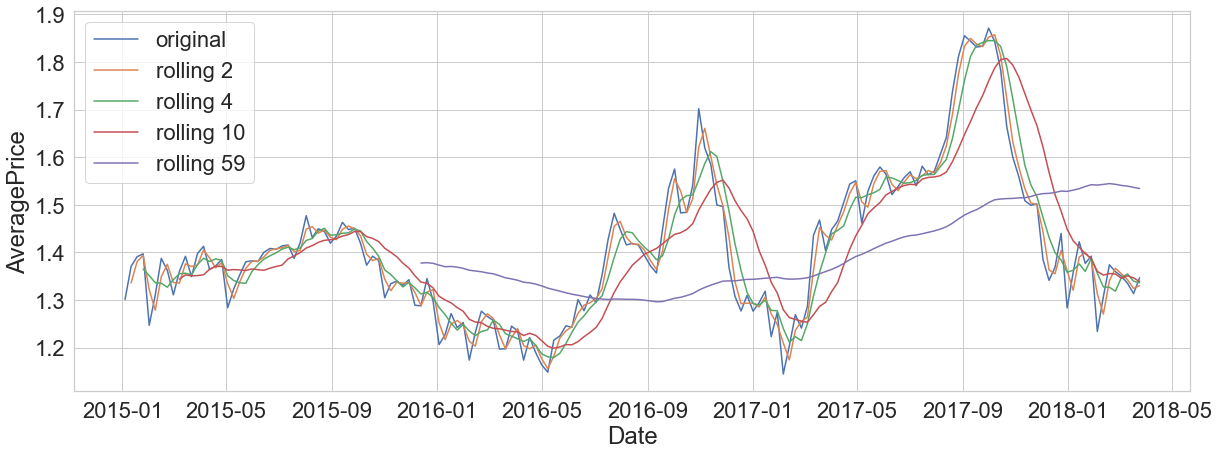

In [25]:
sns.lineplot(x=avocado_mean.index, y=avocado_mean.AveragePrice, label= 'original')
sns.lineplot(x=avocado_mean_rolling_2.Date, y=avocado_mean_rolling_2.AveragePrice, label='rolling 2')
sns.lineplot(x=avocado_mean_rolling_4.Date, y=avocado_mean_rolling_4.AveragePrice, label='rolling 4' )
sns.lineplot(x=avocado_mean_rolling_10.Date, y=avocado_mean_rolling_10.AveragePrice, label='rolling 10' )
sns.lineplot(x=avocado_mean_rolling_50.Date, y=avocado_mean_rolling_50.AveragePrice, label='rolling 59' )

### Вариант 2

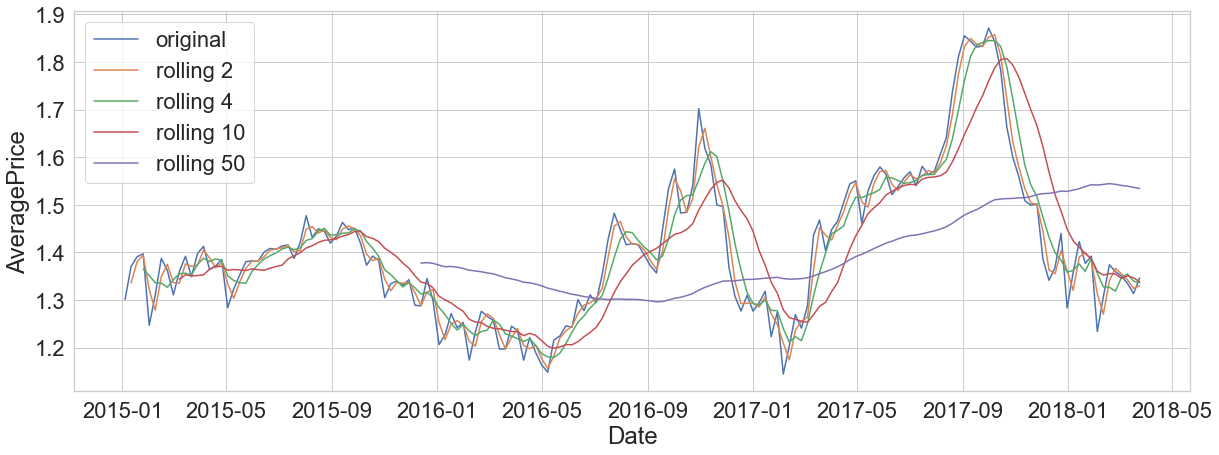

In [32]:
windows = [2,4,10,50]

sns.lineplot(x=avocado_mean.index, y=avocado_mean.AveragePrice, label= 'original')

for window in windows:
    tdf = avocado_mean.AveragePrice.rolling(window).mean().reset_index()
    sns.lineplot(x=tdf.Date, y=tdf.AveragePrice, label= f'rolling {window}') 
    

## 4) Изучите параметры функций(df.rooling()):
 - axis
 - center
 - closed
 - min_periods
 - on
 - win_type
 - window
 
 в документации https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html и дайте характеристику каждой из вышеперечисленных.

In [45]:
avocado_mean.rolling(window=4,min_periods=1, center=True, win_type='triang',closed='both').mean()   # shift + tab + tab  вызов справки

,AveragePrice
Date,
2015-01-04,1.318634
2015-01-11,1.343849
2015-01-18,1.372963
2015-01-25,1.372801
2015-02-01,1.329259
...,...
2018-02-25,1.357292
2018-03-04,1.354826
2018-03-11,1.341146


In [76]:
# axis - ось (столбец или колонка)
# window - размер окна ролла (кол-во значений для вычисления их среднего) можно писать одно число
# min_periods - с какой строчким начать ролл  (чтобы небыло нанов =  1)
# center - если True, то считает не для последнего значения окна, а для среднего
# closed - интервал (закрытый или открытый) (хз)
# on - колонка на основе которой считать, если не на основе индекса
# win_type - тип окна. если None то все наблюдения имеют равный вес

## 5 Используйте агрегированные данные avocado_mean.csv 
о ценах на авокадо и примените функцию ewm() с параметром span=2, 
чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [50]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.353310
2015-01-18,1.379480
2015-01-25,1.391394
2015-02-01,1.294758
...,...
2018-02-25,1.356212
2018-03-04,1.352194
2018-03-11,1.340793


## 6.Импортируйте полные данные, (avocado_full.csv) указав index_col=0 
(использовать первую колонку как индекс).
 Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное 
скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски.
Числа округлите до трех знаков после точки.


In [145]:
avocado_full = pd.read_csv('avocado_full.csv', index_col=0)
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [140]:
organic_chicago = avocado_full.query('type == "organic" and region == "Chicago"')
organic_chicago

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rolling,ewm
Date,,,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago,1.490,1.490
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago,1.640,1.678
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago,1.697,1.745
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago,1.730,1.784
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago,1.737,1.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago,1.652,1.677
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago,1.652,1.654
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago,1.655,1.656


In [137]:
avocado_full['rolling'] = avocado_full \
                    .query('type == "organic" and region == "Chicago"') \
                    .AveragePrice \
                    .rolling(window=4,min_periods=1) \
                    .mean() \
                    .round(3)
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rolling
Date,,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast,1.490
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,1.490
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton,1.490
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh,1.490
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise,1.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago,1.657
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral,1.657
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral,1.657


In [139]:
avocado_full['ewm'] = avocado_full \
.query('type == "organic" and region == "Chicago"') \
.AveragePrice \
.ewm(span=4) \
.mean() \
.round(3)

<AxesSubplot:xlabel='Date'>

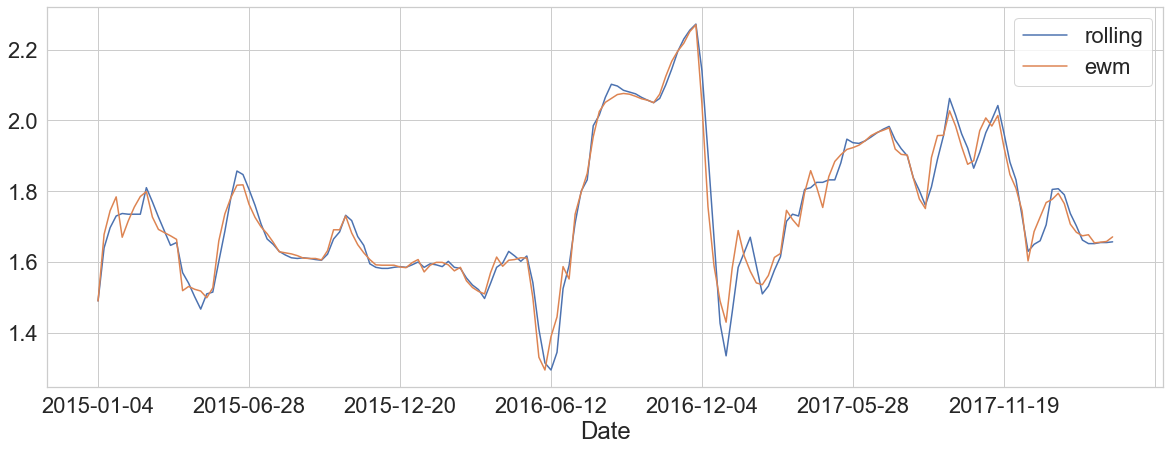

In [141]:
organic_chicago[['rolling','ewm']].plot()

In [142]:
organic_chicago.loc['2016-08-21',['rolling','ewm']]

rolling    2.102
ewm        2.062
Name: 2016-08-21, dtype: object

## 7. Далее будем работать с данными по опозданиям в заключении сделок!
В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, 
а самое важное – насколько они при этом опоздали

In [ ]:

#  		client_idcompany_id	delay		revenue
#  	0	2389	4240	-1 days -14:57:48.000000000	705436
#  	1	7614	9544	-4 days -02:14:23.000000000	859266
#  	2	2052	2427	-0 days -06:08:57.000000000	812416
#  	3	9635	8054	-0 days -23:40:19.000000000	162312
#  	4	8154	5503	-1 days -13:21:53.000000000	658844

# Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – 
#нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) 
#и переведите её в тип timedelta.
# Могут понадобиться:
# pd.to_timedelta()
# pd.Series.str

In [167]:
df = pd.read_csv('delays.csv')


In [168]:
df['delay'] = pd.to_timedelta(df.delay.str.replace('-', ''))

In [169]:
df

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


## 8. Разбейте время на 3 интервала и поместите 
 соответствующие значения в колонку delay_categorical
 Могут понадобится:
pd.cut()

In [176]:
df['delay_categorical']=pd.cut(df.delay, bins=3)

In [177]:
df.delay_categorical

0      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
1           (3 days 08:05:36.333333333, 4 days 23:51:14]
2      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
3      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
4      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
                             ...                        
259    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
260         (3 days 08:05:36.333333333, 4 days 23:51:14]
261    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
262    (1 days 16:19:58.666666666, 3 days 08:05:36.33...
263    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
Name: delay_categorical, Length: 264, dtype: category
Categories (3, interval[timedelta64[ns]]): [(0 days 00:27:11.587000, 1 days 16:19:58.66666... < (1 days 16:19:58.666666666, 3 days 08:05:36.33... < (3 days 08:05:36.333333333, 4 days 23:51:14]]

## 9.Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. 
В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были
 'less than 1 day' – время от 0 до 1 дня
 
 '1-2 days' – от 1 до 2 дней
 
 '2-3 days' – от 2 до 3 дней
 
 'more than 3 days' – больше 3 дней
 
 Могут понадобится:
 pd.cut()
 pd.to_timedelta()


In [184]:
bins = [pd.to_timedelta('0d'),   #если работаем с днями, можно сделать список дней
       pd.to_timedelta('1d'),
       pd.to_timedelta('2d'),
       pd.to_timedelta('3d'),
       pd.to_timedelta('100d')]

In [182]:
labels =  ['less than 1 day',
           '1-2 days', 
           '2-3 days',
           'more than 3 days']

In [193]:
df['delay_categorical'] = pd.cut(df.delay,
       bins=bins,
      labels=labels,)


In [192]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


## 10. Постройте интерактивный барплот с тем, насколько часто задерживаются сделки, выясните самый редкий и самый частый варианты

In [215]:
df_dc = df.groupby('delay_categorical').agg({'revenue': 'count'}).rename(columns={'revenue': 'total'})

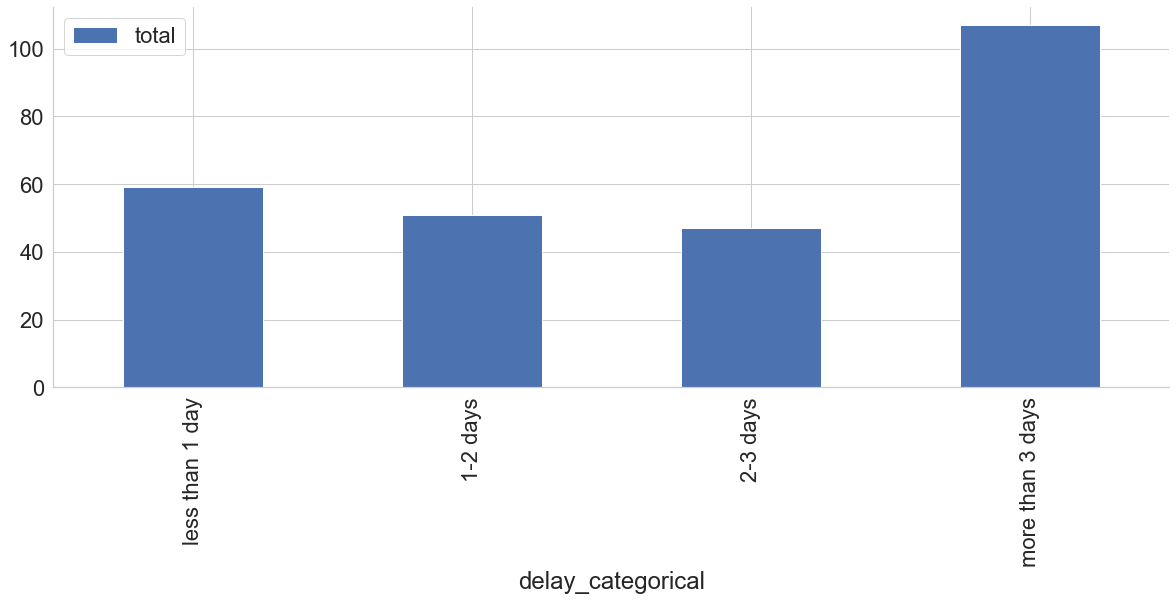

In [216]:
ax = df_dc.plot.bar()
sns.despine()